In [1]:
# Time Series Material
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# DatasetTeSelec.csv
DatasetTeSelec = pd.read_csv('datasetTeSelec.csv')
# FeaturesFirstPaper.csv
featuresFirstPaper = pd.read_csv('featuresFirstPaper.csv')
DatasetTeSelec.rename( columns={'Unnamed: 0':'idSerie'}, inplace=True )

In [24]:
#Get the min and max values for each column in the dataframe
def getMaxandMin(dataset):
    maxSeries = dataset.max();
    minSeries = dataset.min();    
    return maxSeries,minSeries


# E: Dataset 1 and 2: CSVs, feature: the feature you want to get the max and min
# O: Two plots
def generatePlot(dataset1, dataset2, feature):
    
    # Get rows from data set with max and min values
    values = getMaxandMin(dataset1)
    minValueData = dataset1.loc[dataset1[feature] == values[1][feature]]
    maxValueData = dataset1.loc[dataset1[feature] == values[0][feature]]
    
    
    # Get time series data from second dataframe transposed
    minValueData = dataset2.loc[dataset2['idSerie'] == minValueData['id'].values[0]].reset_index(drop=True)
    maxTimeSeriesData = dataset2.loc[dataset2['idSerie'] == maxValueData['id'].values[0]].reset_index(drop=True)
    
    # Make data for plot for max value
    maxIdSerie = int(maxTimeSeriesData.iloc[0]['idSerie'])
    maxTimeSeriesData = maxTimeSeriesData.drop(['idSerie'], axis=1).squeeze().dropna()
    plt.figure(figsize=(18,6))
    plt.xticks(rotation=90)
    plt.grid(linewidth=0.5)
    plt.ylim(2, 3)
    plt.title("Max Value of " + feature)
    plt.plot(maxTimeSeriesData.index, maxTimeSeriesData.values)
    
    # Make data for plot for min value
    minIdSerie = int(minValueData.iloc[0]['idSerie'])
    minValueData = minValueData.drop(['idSerie'], axis=1).squeeze().dropna()
    plt.figure(figsize=(20,6))
    plt.xticks(rotation=90)
    plt.grid(linewidth=0.5)
    plt.ylim(2, 3)
    plt.title("Min Value of " + feature)
    plt.plot(minValueData.index, minValueData.values, color='red')
    
    return 
    


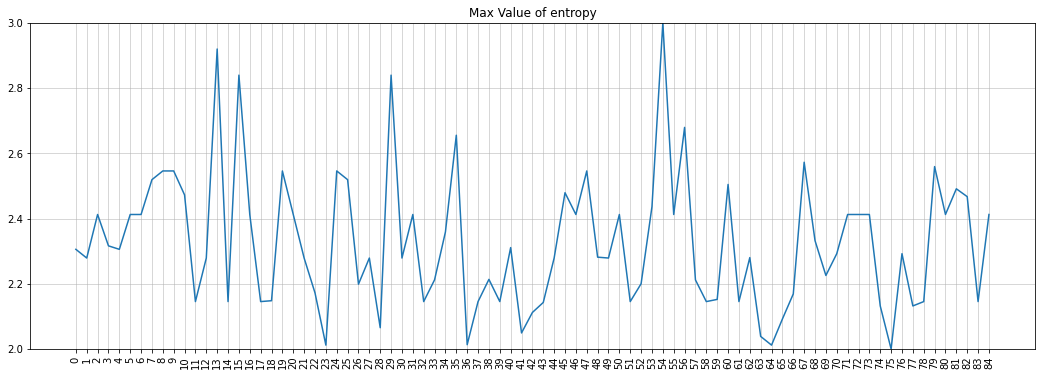

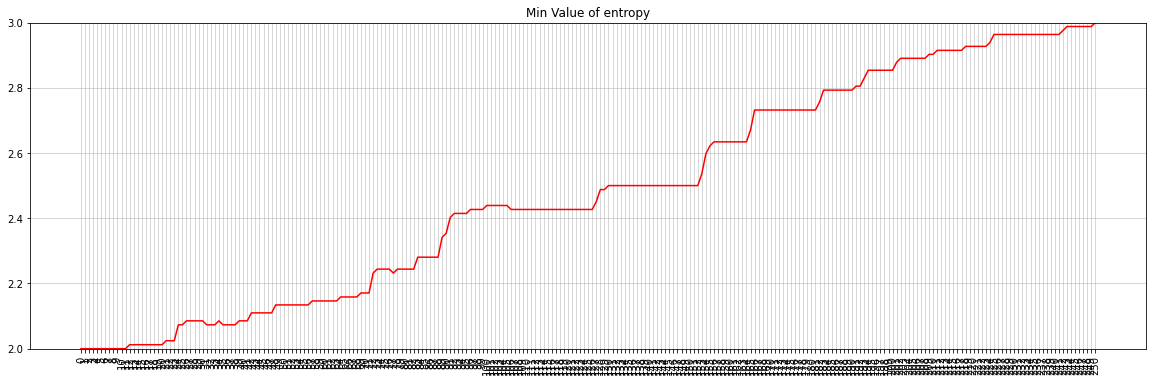

In [9]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'entropy')

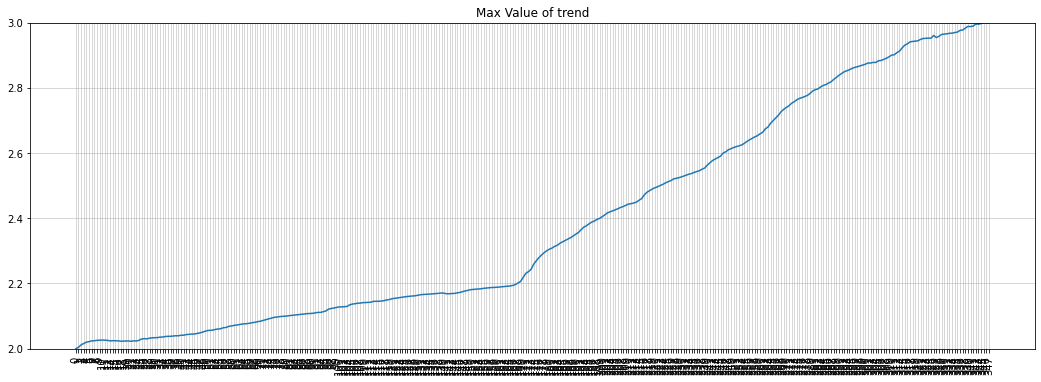

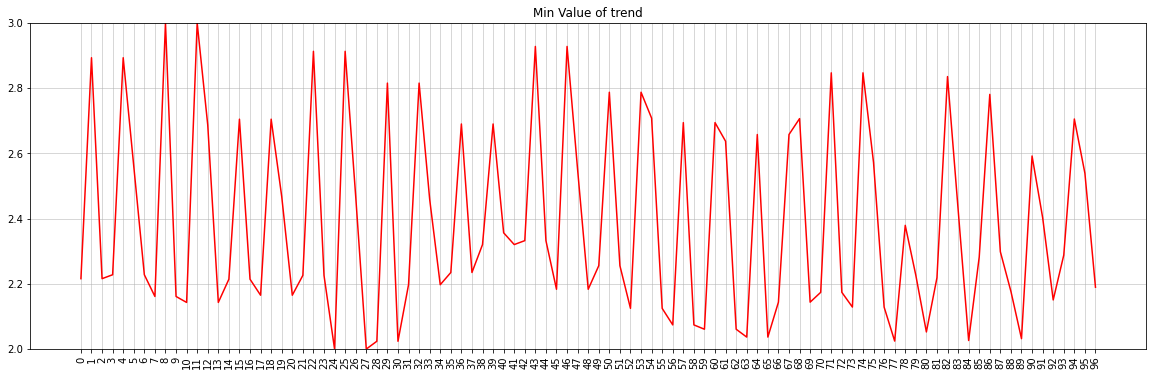

In [10]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'trend')

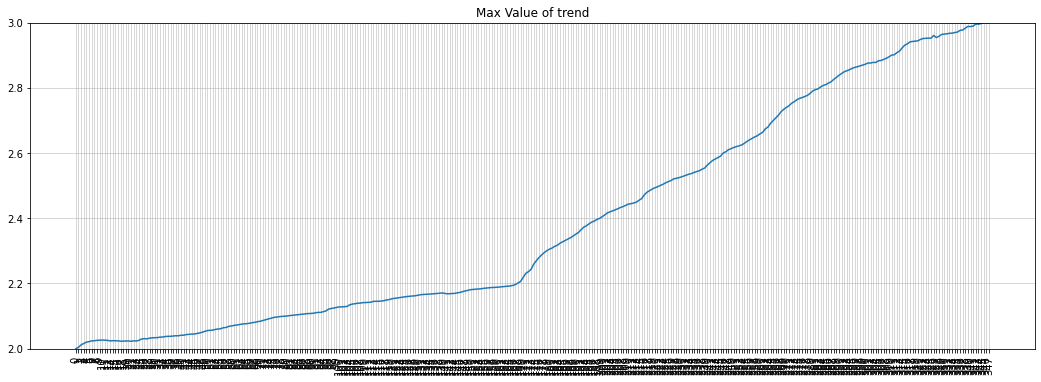

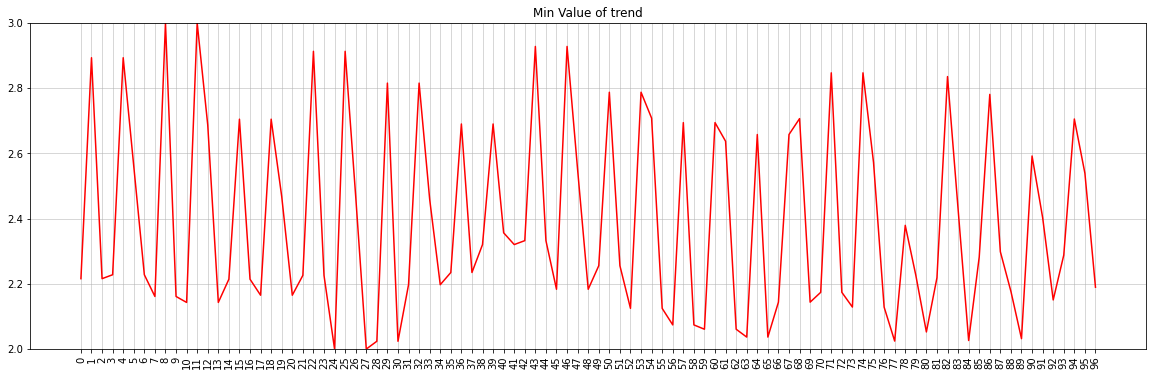

In [11]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'trend')


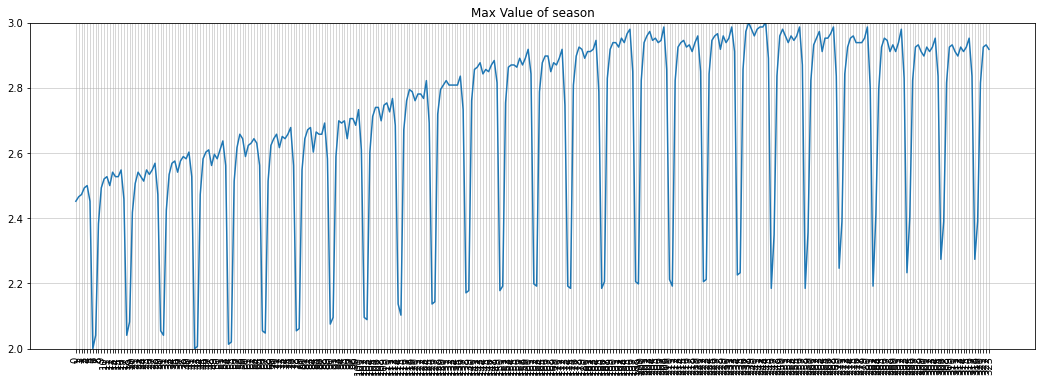

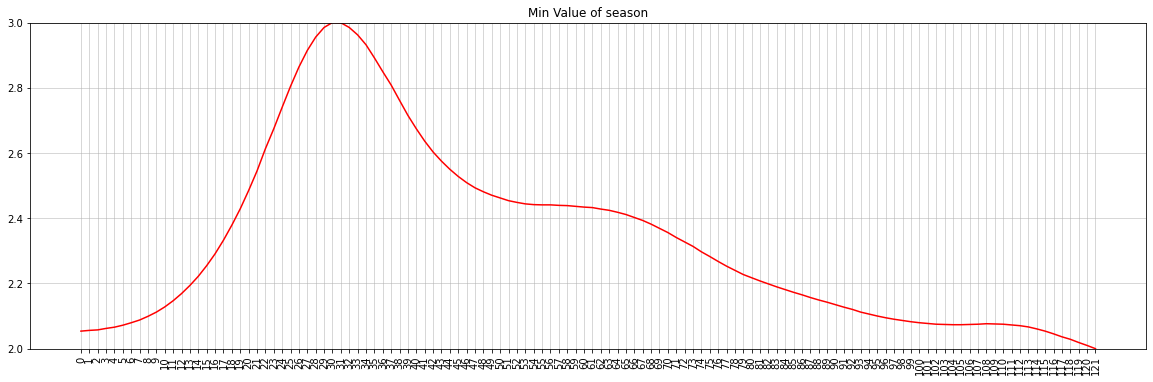

In [12]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'season')

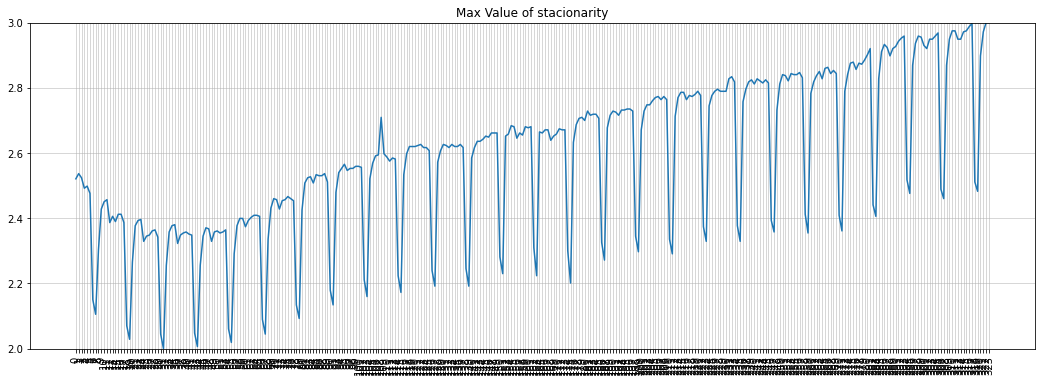

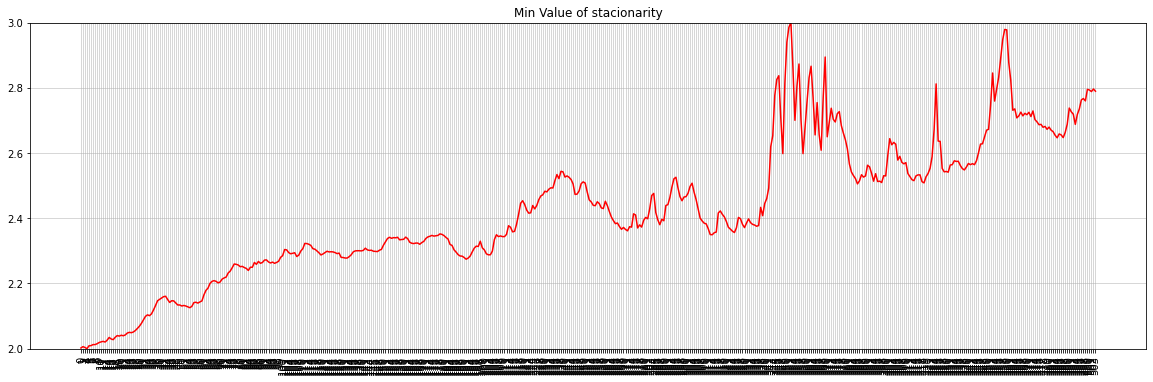

In [20]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'stacionarity')

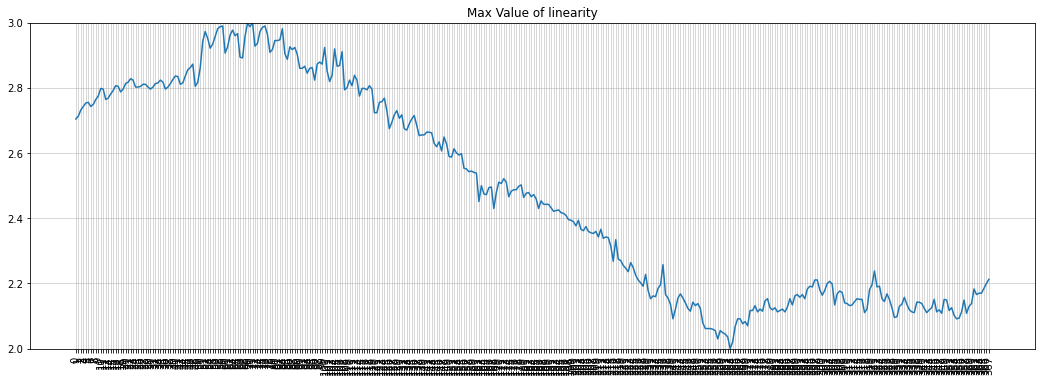

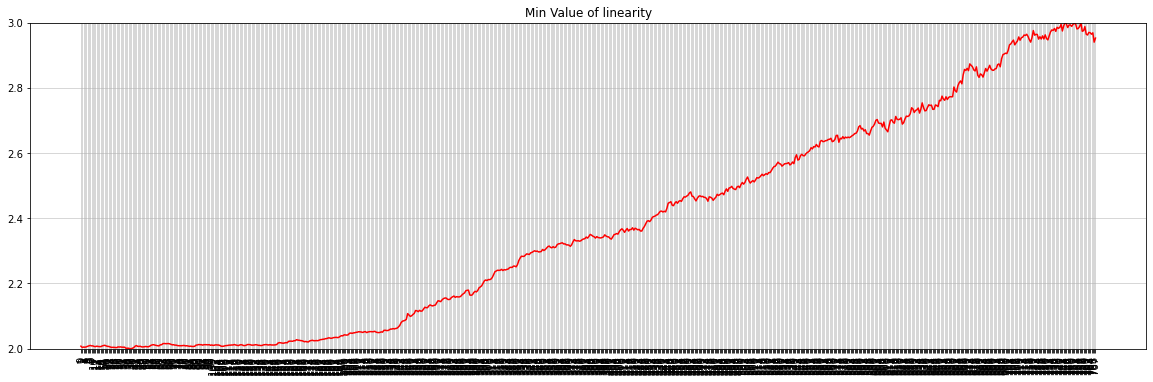

In [13]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'linearity')

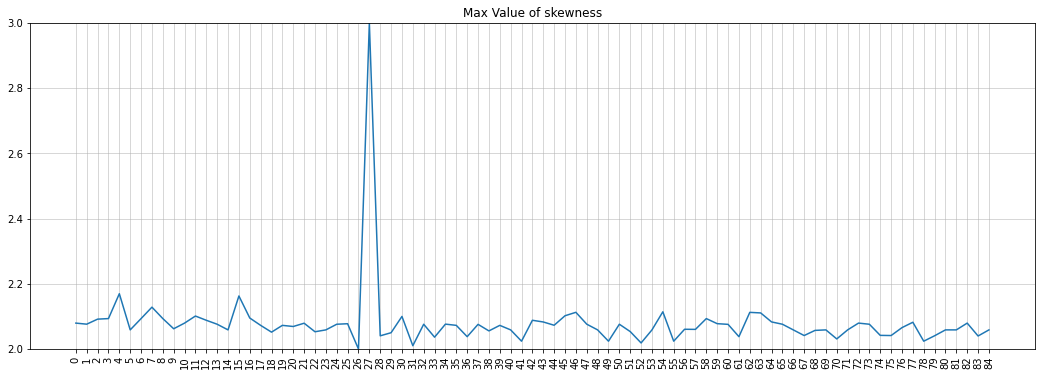

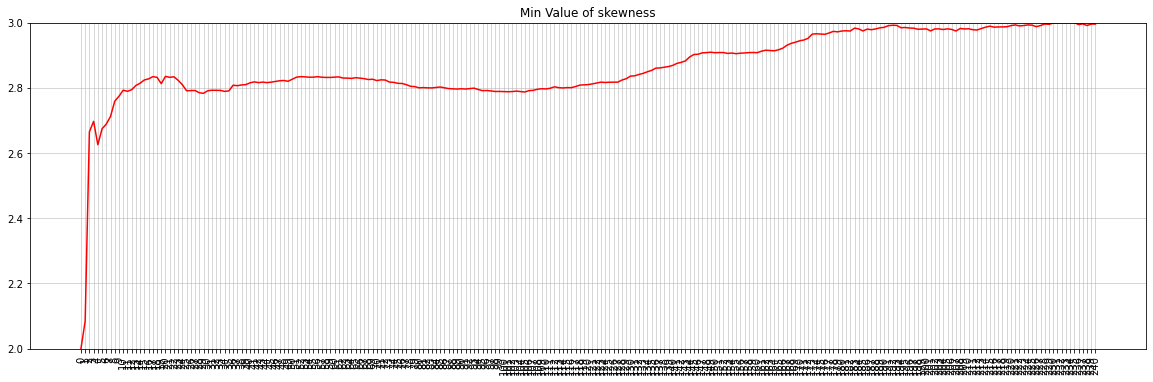

In [14]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'skewness')

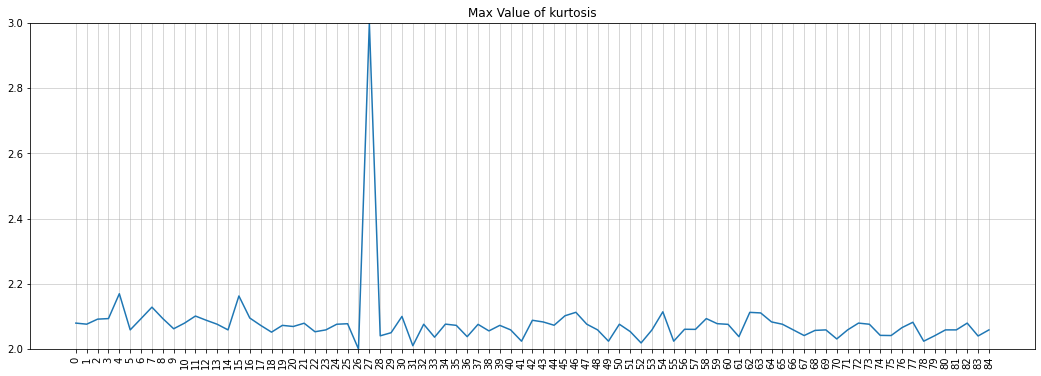

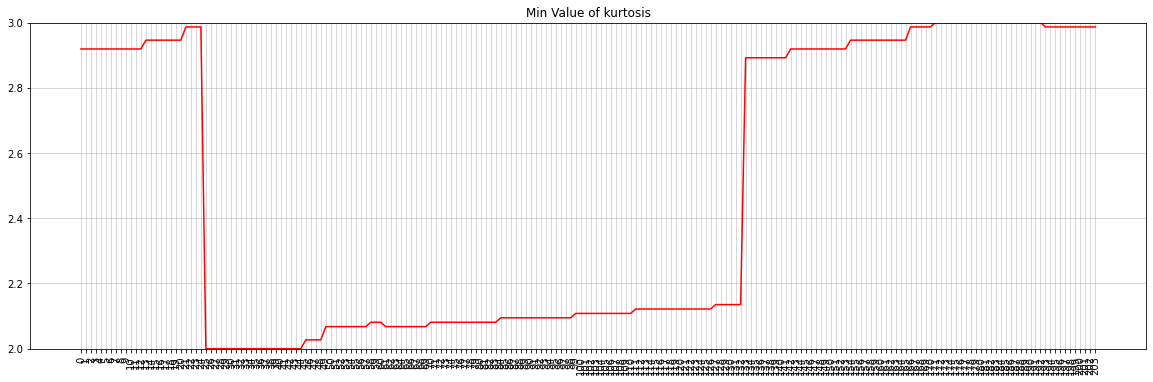

In [15]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'kurtosis')

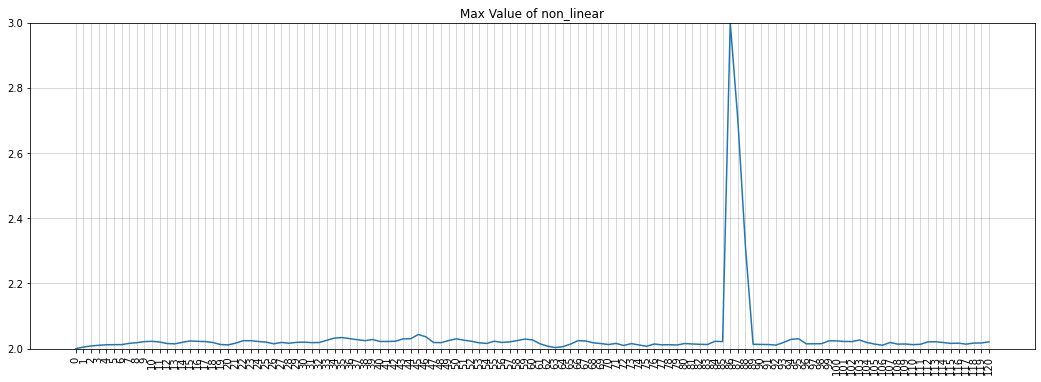

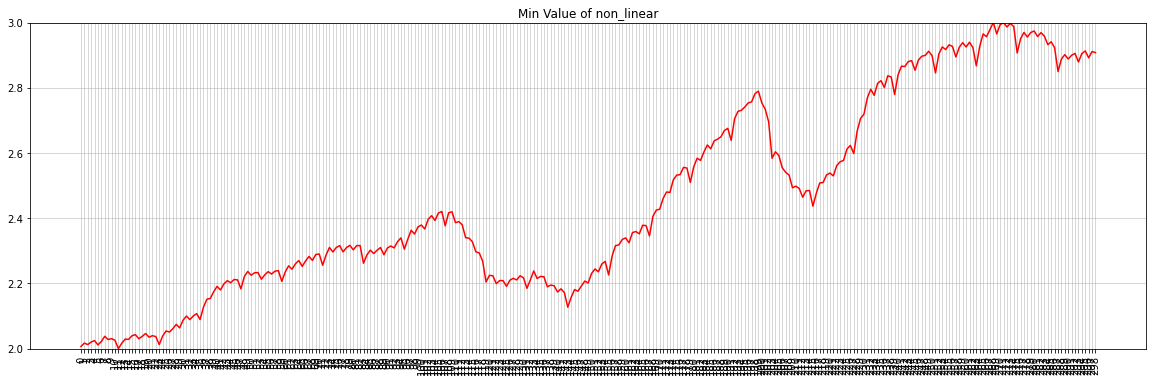

In [16]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'non_linear')

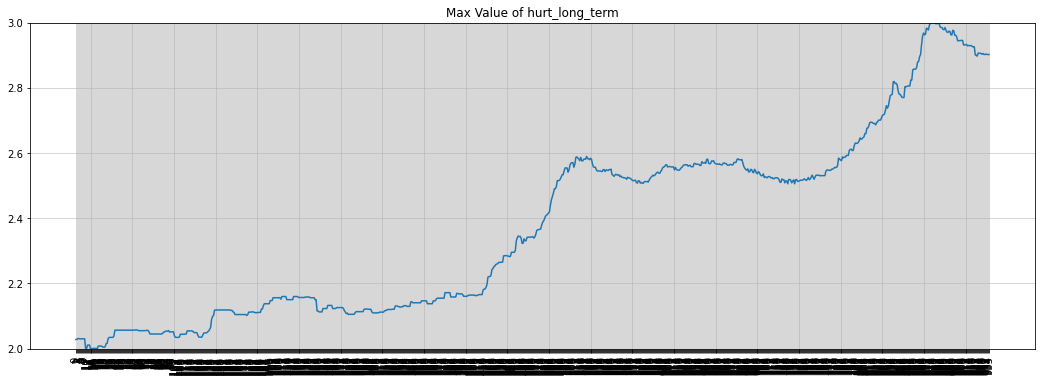

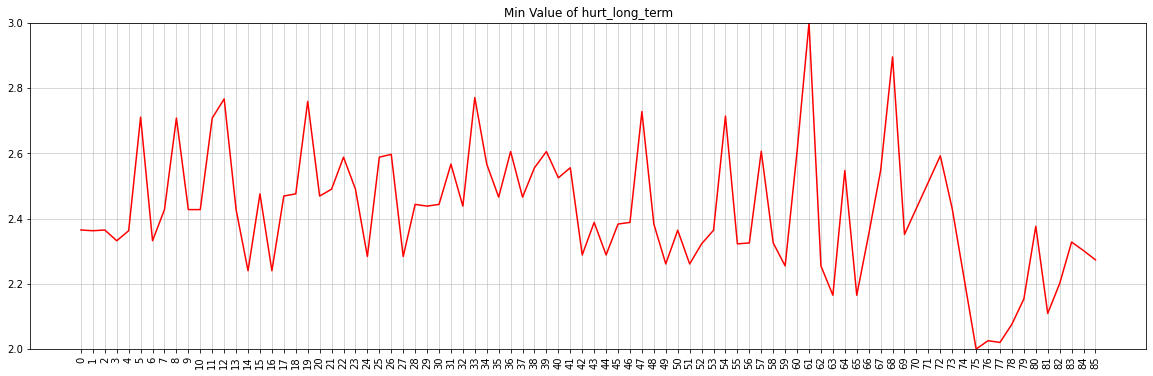

In [17]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'hurt_long_term')

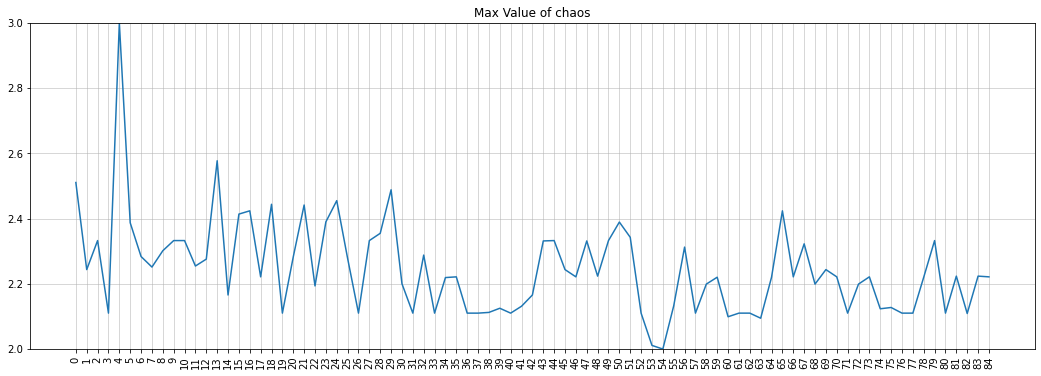

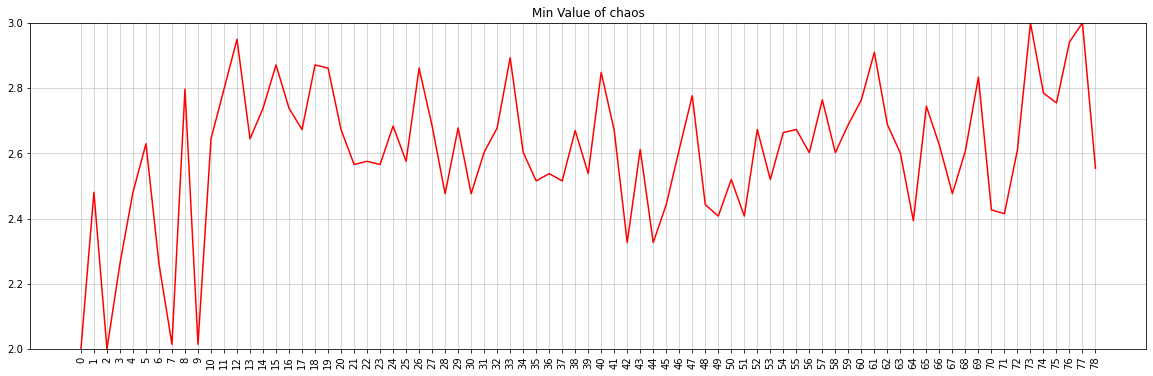

In [18]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'chaos')

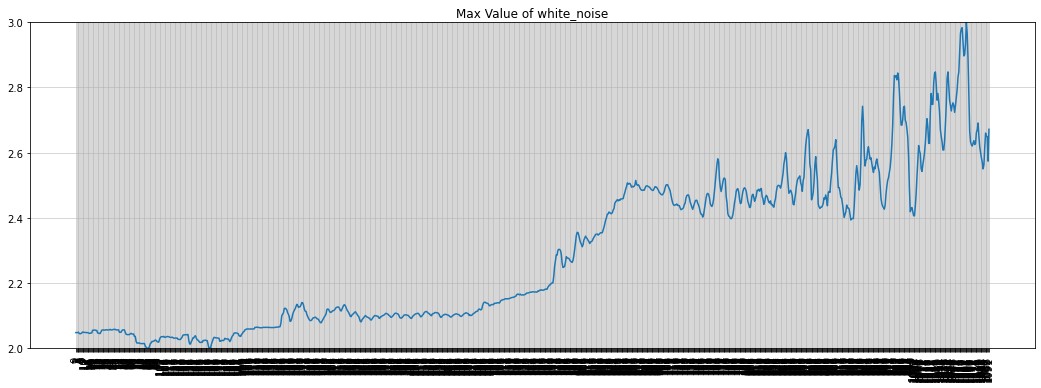

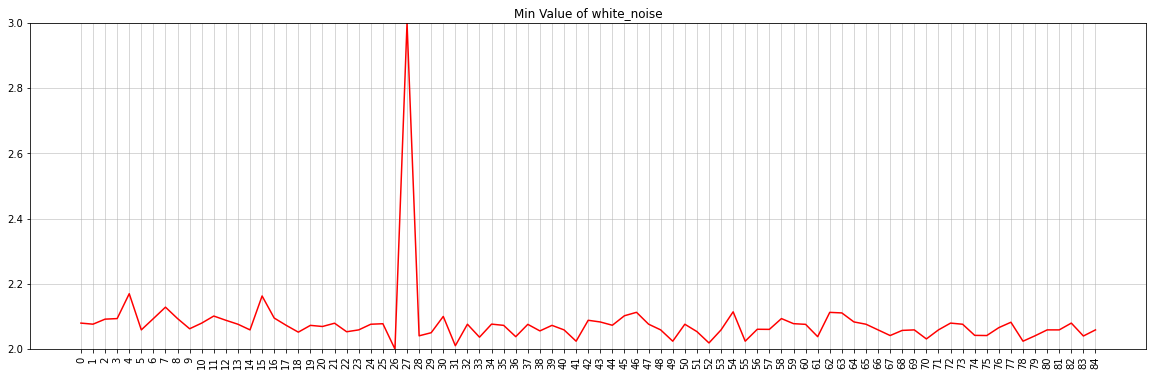

In [19]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'white_noise')

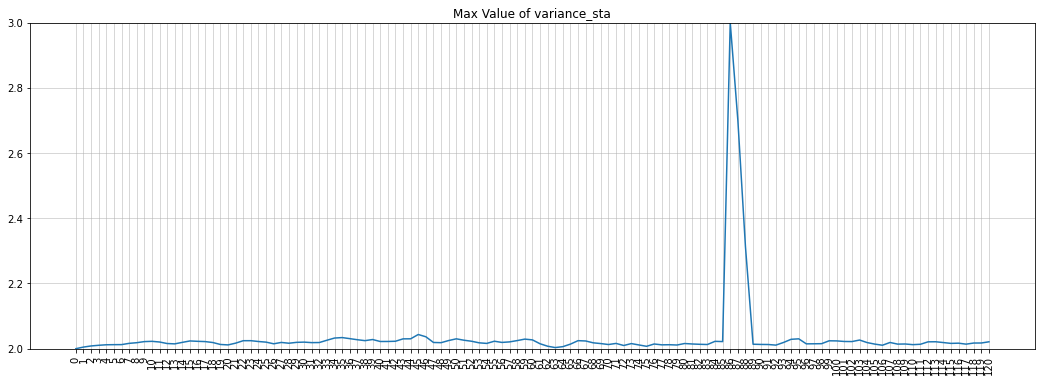

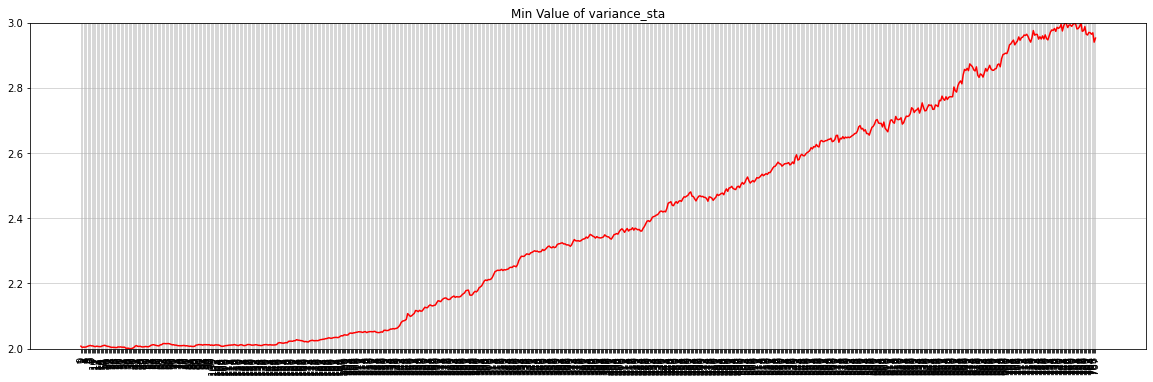

In [21]:
generatePlot(featuresFirstPaper,DatasetTeSelec, 'variance_sta')